In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [11]:
data = pd.read_csv('Mall_Customers.csv')

In [12]:
 data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
data.shape

(200, 5)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
# Drop column Customer ID
data = data.drop(columns = 'CustomerID')
data.head()


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [16]:
#Rename Genre as Gender
data = data.rename(columns= {'Genre':'Gender'})
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [17]:
#Let's Consider male as 0 and femal as 1
data = data.replace({'Gender':{'Male':0,'Female':1}})
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [18]:
data['Gender'].unique()

array([0, 1], dtype=int64)

In [19]:
#Normalize all variavles
from sklearn.preprocessing import Normalizer
norm = Normalizer()
columns = data.columns
norm_data = norm.fit_transform(data)
norm_data = pd.DataFrame(norm_data,columns = columns)
norm_data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,0.413925,0.326783,0.849635
1,0.000000,0.247025,0.176446,0.952809
2,0.037987,0.759737,0.607790,0.227921
3,0.012203,0.280676,0.195253,0.939653
4,0.018728,0.580581,0.318383,0.749137


In [20]:
#Clustering Data
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(norm_data)
pred = kmeans.predict(norm_data)

In [21]:
len(pred)

200

In [22]:
#calculating intertia
kmeans.inertia_

15.236147767255536

In [23]:
kmeans.score(norm_data)

-15.236147767255538

In [24]:
#to check n_clusters
SSE = []
for cluster in range(1,10):
  kmeans = KMeans(n_clusters = cluster)
  kmeans.fit(norm_data)
  SSE.append(kmeans.inertia_)

In [25]:
frame = pd.DataFrame({'Cluster':range(1,10),'Inertia':SSE})

<function matplotlib.pyplot.show(close=None, block=None)>

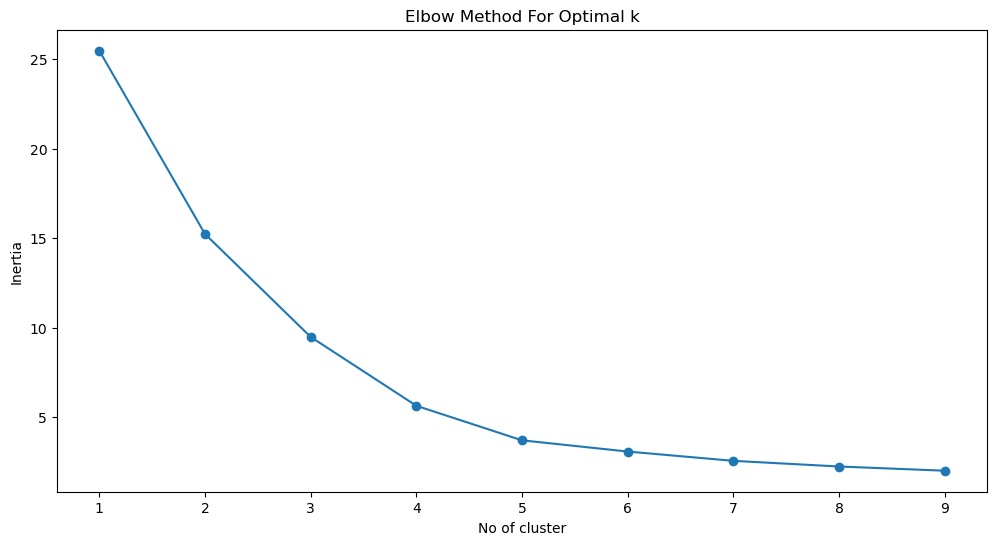

In [26]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'],frame['Inertia'],marker = 'o')
plt.xlabel('No of cluster')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show

In [27]:
#Number of cluster as 3
kmeans = KMeans(n_clusters = 3)
kmeans.fit(norm_data)
pred = kmeans.predict(norm_data)
norm_data['cluster']=pred

In [28]:
print(norm_data)

       Gender       Age  Annual Income (k$)  Spending Score (1-100)  cluster
0    0.000000  0.413925            0.326783                0.849635        2
1    0.000000  0.247025            0.176446                0.952809        2
2    0.037987  0.759737            0.607790                0.227921        0
3    0.012203  0.280676            0.195253                0.939653        2
4    0.018728  0.580581            0.318383                0.749137        0
..        ...       ...                 ...                     ...      ...
195  0.006762  0.236686            0.811496                0.534235        2
196  0.007315  0.329196            0.921748                0.204833        1
197  0.000000  0.213924            0.842324                0.494698        2
198  0.000000  0.225615            0.965915                0.126909        1
199  0.000000  0.184087            0.840665                0.509308        2

[200 rows x 5 columns]


In [66]:
import matplotlib.pyplot as plt

def plot_clusters(str_x, str_y, clusters):
    plt.figure(figsize=(5, 5), dpi=120)
    try:
        x, y = seg(str_x, str_y, clusters)
        for i in range(clusters):
            plt.scatter(x[i], y[i], label='Cluster {}'.format(i))
        plt.xlabel(str_x)
        plt.ylabel(str_y)
        plt.legend()
        plt.show()
    except KeyError as e:
        print(f"KeyError: {e}. Check if the 'Cluster' column exists in 'norm_data'.")
    except Exception as e:
        print(f"An error occurred: {e}")

def seg(str_x, str_y, clusters):
    x = []
    y = []
    print(norm_data.columns)  # Debug statement to list all columns
    for i in range(clusters):
        try:
            x.append(data[str_x][norm_data['cluster'] == i])
            y.append(data[str_y][norm_data['cluster'] == i])
        except KeyError as e:
            print(f"KeyError: {e}. Column not found in DataFrame.")
            raise
    return x, y

# Assuming 'data' and 'norm_data' are defined DataFrames
# plot_clusters('Age', 'Spending Score (1-100)', 3)


Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')


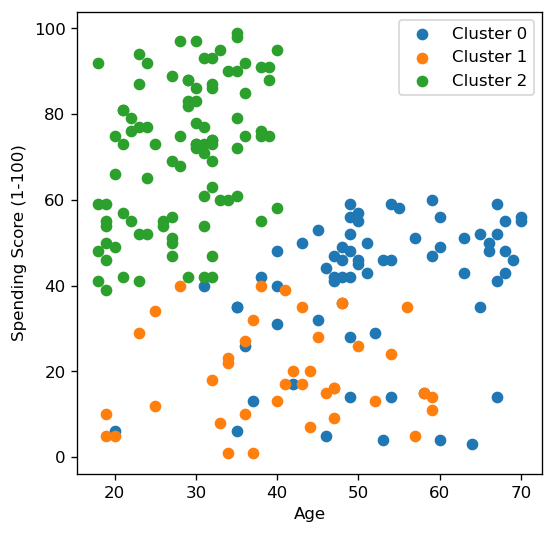

In [68]:
#Age vs Spending Score
plot_clusters('Age','Spending Score (1-100)',3)

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'cluster'],
      dtype='object')


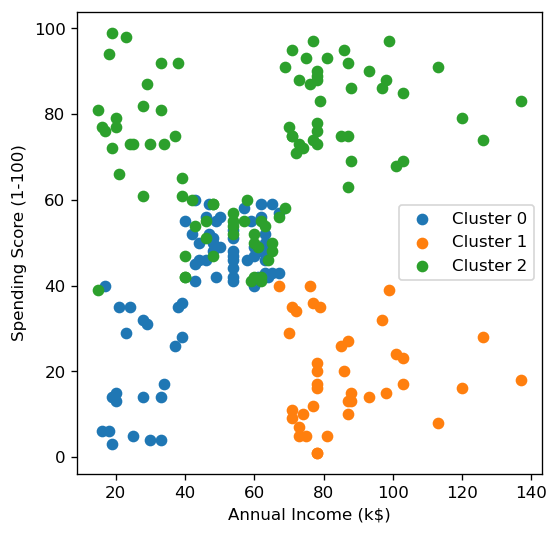

In [70]:
#Annual Income vs Spending Score
plot_clusters('Annual Income (k$)','Spending Score (1-100)',3)

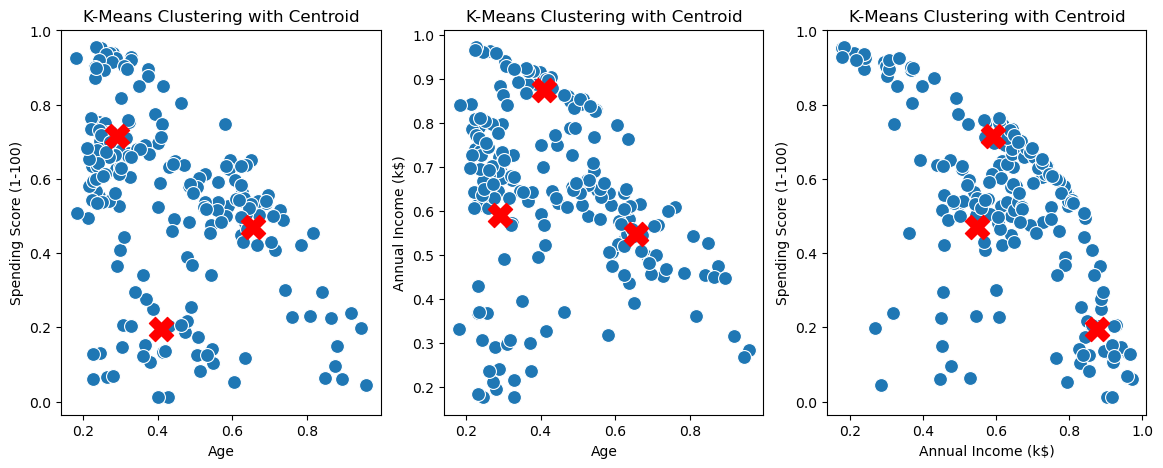

In [32]:

# Plotting the results
feature_x = 'Age'
feature_y = 'Annual Income (k$)'
feature_z = 'Spending Score (1-100)'

plt.figure(figsize=(14,5))
plt.subplot(1,3,1)
sns.scatterplot(data=norm_data,x = feature_x, y=feature_z ,palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='X')
plt.title('K-Means Clustering with Centroid')
plt.xlabel(feature_x)
plt.ylabel(feature_z)

plt.subplot(1,3,2)
sns.scatterplot(data=norm_data,x = feature_x, y=feature_y ,palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s=300, c='red', marker='X')
plt.title('K-Means Clustering with Centroid')
plt.xlabel(feature_x)
plt.ylabel(feature_y)

plt.subplot(1,3,3)
sns.scatterplot(data=norm_data,x = feature_y, y=feature_z ,palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='X')
plt.title('K-Means Clustering with Centroid')
plt.xlabel(feature_y)
plt.ylabel(feature_z)
plt.show()

In [33]:

kmeans.labels_

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [34]:

data['Label'] = kmeans.labels_
data.head()
     

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,0
3,1,23,16,77,2
4,1,31,17,40,0


In [35]:
data.Label.value_counts()

Label
2    93
0    68
1    39
Name: count, dtype: int64

In [36]:

for k in range(3):
    print(f'cluster nb : {k}')
    print(data[data['Label'] == k].describe())
    print('\n\n')

cluster nb : 0
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  Label
count  68.000000  68.000000           68.000000               68.000000   68.0
mean    0.588235  52.250000           45.485294               39.852941    0.0
std     0.495812  10.997116           15.143584               16.193111    0.0
min     0.000000  20.000000           16.000000                3.000000    0.0
25%     0.000000  46.750000           33.750000               34.250000    0.0
50%     1.000000  50.000000           48.000000               45.500000    0.0
75%     1.000000  60.750000           59.250000               51.000000    0.0
max     1.000000  70.000000           67.000000               60.000000    0.0



cluster nb : 1
          Gender        Age  Annual Income (k$)  Spending Score (1-100)  Label
count  39.000000  39.000000           39.000000               39.000000   39.0
mean    0.487179  40.333333           86.487179               19.179487    1.0
std     0.506370  1